## Computing conditional probabilities with Pandas

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read observations A to B, and B to C into data frames
df_AtoB = pd.read_table('./data/a_to_b.txt', header=None, names=['a_to_b'])
df_BtoC = pd.read_table('./data/b_to_c.txt', header=None, names=['b_to_c'])
# Merge data frames
df = pd.concat([df_AtoB, df_BtoC], axis=1)
print df.head()

   a_to_b  b_to_c
0      27      29
1      23      34
2      25      11
3      27      35
4      25      35


### Convention
In the following we introduce the events A and B as follows:
- Event A: event of travelling from A to B
- Event B: event of travelling from B to C

Our aim is to compute the probability of $A \cap B$ as: $ p(A \cap B) = p(B/A) * p(A)$

### Compute $p(A)$

In [3]:
# Probability of event A: travelling from A to B
prob_A = df.groupby('a_to_b').size().div(len(df))

### Compute $p(B/A)$

In [4]:
# Conditional probability of event B given A: travelling from B to C given A to B
prob_B_given_A = df.groupby(['b_to_c', 'a_to_b']).size().div(len(df)).div(prob_A, axis=0, level=1)
print prob_B_given_A.head(13)

b_to_c  a_to_b
6       22        0.042553
        24        0.034884
        25        0.020619
        26        0.017241
        39        0.043478
        47        0.023810
        50        0.050000
        51        0.050000
7       23        0.052632
        25        0.051546
        26        0.034483
        27        0.093023
        28        0.088235
dtype: float64


### Compute  $p(A \cap B)$

In [5]:
# Compute total time to travel from A to C
time_a_to_c = [ii + jj for (ii,jj) in \
               zip(prob_B_given_A.index.get_level_values('a_to_b'),prob_B_given_A.index.get_level_values('b_to_c'))]

# and put it into a datframe
df_result = pd.DataFrame({'time_a_to_c':time_a_to_c})

# Compute the corresponding probabilities o travelling from A to C for each pair (A to B, B to C)
df_result['prob_a_to_c']=[prob_B_given_A[jj][ii] * prob_A[ii] for (ii,jj) in \
                          zip(prob_B_given_A.index.get_level_values('a_to_b'), prob_B_given_A.index.get_level_values('b_to_c'))]


In [6]:
# Group by total time to travel from A to C in order to have unique values of travelling time
result = df_result.groupby(['time_a_to_c']).sum()

### Display probability distribution of $p(A \cap B) = p(B/A) * p(A)$

1.0


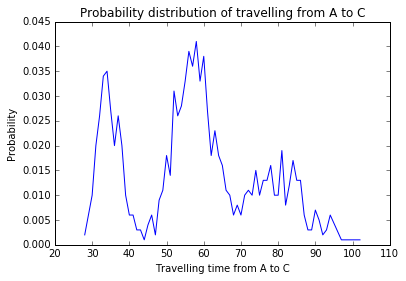

In [7]:
# Check that sum of probabilities = 1
print sum(result.prob_a_to_c)

# and plot distribution
plt.plot(result.index.get_level_values('time_a_to_c'), result.prob_a_to_c)
plt.xlabel('Travelling time from A to C')
plt.ylabel('Probability')
plt.title('Probability distribution of travelling from A to C')